In [2]:
using Perla1, Plots, Optim, Revise

# Exogenous baseline

In [3]:
params_exog_awareness = stationary_params_awareness_default()
params_exog = stationary_params_exogenous_default()
settings =  stationary_settings_default()
ss_exog = steadystate(params_exog_awareness, params_exog, stationary_settings_default());
@show params_exog_awareness
@show ss_exog.v_0;

params_exog_awareness = (θ = 0.06, μ = 1.0, ẑ_M = 1.0)
ss_exog.v_0 = 0.008239526245651264


# Setup for Endogenous

In [4]:
ẑ_M_val(params, θ) = params.z_M + 1/params.d(θ, μ, params)
θ = settings.θ_first_guess
μ = 1.0    
function plotobjective(ss, params, settings)
    θ_bounds = params.θ_bounds(params)
    θ_grid = range(θ_bounds[1], θ_bounds[2], length = 20)
    θ = settings.θ_first_guess
    μ = 1.0    
    objective_by_θ_i(θ_i, ss) = θ_μ_objective(θ_i, θ, ss, params, settings)
    p = plot(θ_grid, θ_i -> objective_by_θ_i(θ_i, ss),
        linewidth = 5.0, label = ["theta_i"])
    plot!([θ], seriestype="vline", linewidth = 5.0, label = ["theta_i", "theta"])
    plot!([Optim.optimize(θ_i -> objective_by_θ_i(θ_i, ss), θ_bounds[1], θ_bounds[2]).minimizer], seriestype="vline", linewidth = 2.0, label = ["theta_i", "theta", "theta*"])
    return p
end

plotobjective (generic function with 1 method)

# Variations

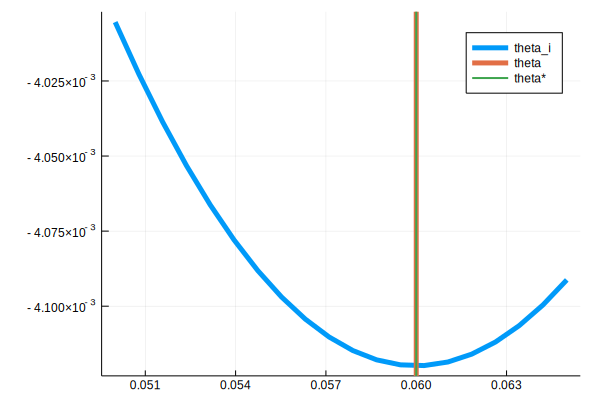

In [5]:
params = stationary_params_endogenous_default(ν = 0.0145639, η₁ = 2.0, z_M = -3.04554)
params_awareness = (θ = θ, μ = μ, ẑ_M = ẑ_M_val(params, θ))
ss = steadystate(params_awareness, params, settings);
plotobjective(ss, params, settings)

params_awareness = (θ = 0.06, μ = 1.0, ẑ_M = 0.9999961532645787)


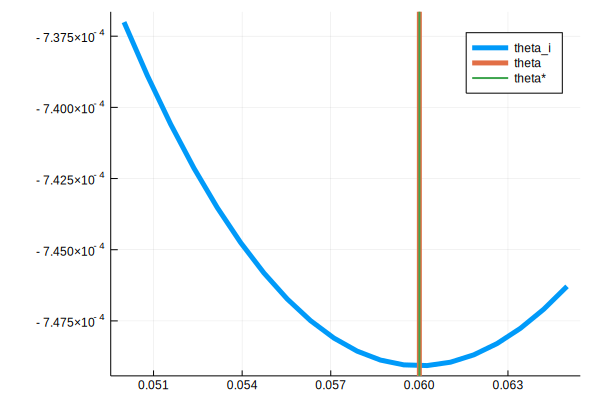

In [11]:
params = stationary_params_endogenous_default(ν = 0.100764, η₁ = 1.1, z_M = -1.22505)
params_awareness = (θ = θ, μ = μ, ẑ_M = ẑ_M_val(params, θ))
@show params_awareness
ss = steadystate(params_awareness, params, settings);
plotobjective(ss, params, settings)

params_awareness = (θ = 0.06, μ = 1.0, ẑ_M = 0.9999770370370378)


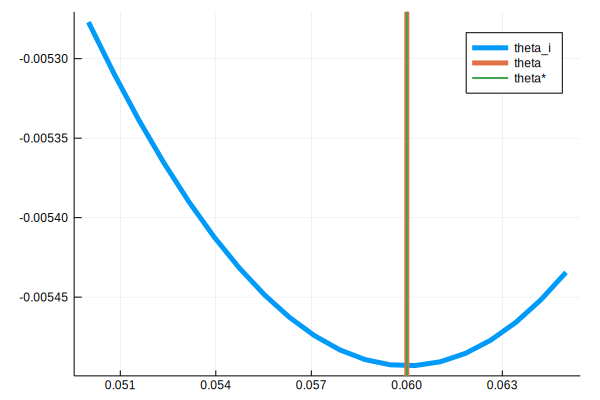

In [6]:
params = stationary_params_endogenous_default(ν = 0.00131075, η₁ = 3.0, z_M = -5.06831)
params_awareness = (θ = θ, μ = μ, ẑ_M = ẑ_M_val(params, θ))
@show params_awareness
ss = steadystate(params_awareness, params, settings);
plotobjective(ss, params, settings)

In [9]:
params = stationary_params_endogenous_default(ν = 0.0145639, η₁ = 2.0, z_M = -3.04554)
settings =  stationary_settings_default(endogenous_max_iteration = 10)
steadystate_endogenous_μ_fixed(params, settings);

1 - 1 / params.d(θ, μ, params) = -3.045527777777778
(θ, ẑ_M) = (0.06, 0.9999877777777781)
(θ, ẑ_M) = (0.06000055148459409, 0.9999134105949405)
(θ, ẑ_M) = (0.060004364296746944, 0.9993993125271396)
(θ, ẑ_M) = (0.060030745509008276, 0.9958449020624025)
(θ, ẑ_M) = (0.060213866458579436, 0.9713011564222853)
(θ, ẑ_M) = (0.061514619725915404, 0.803221513187105)
(θ, ẑ_M) = (0.06499999809673557, 0.4015371249445905)
(θ, ẑ_M) = (0.06499999809673557, 0.4015371249445905)
(θ, ẑ_M) = (0.06499999809673557, 0.4015371249445905)
(θ, ẑ_M) = (0.06499999809673557, 0.4015371249445905)


In [8]:
params = stationary_params_endogenous_default(ν = 0.00131075, η₁ = 3.0, z_M = -5.06831)
settings =  stationary_settings_default(endogenous_max_iteration = 10)
steadystate_endogenous_μ_fixed(params, settings);

1 - 1 / params.d(θ, μ, params) = -5.068287037037038
(θ, ẑ_M) = (0.06, 0.9999770370370378)
(θ, ẑ_M) = (0.060000575180443, 0.9998025223816507)
(θ, ẑ_M) = (0.06000547315637664, 0.9983167057600699)
(θ, ẑ_M) = (0.06004722647885891, 0.9856703732490102)
(θ, ẑ_M) = (0.060406490521516185, 0.8782944503020849)
(θ, ẑ_M) = (0.06376842529751427, -0.013523830565989492)
(θ, ẑ_M) = (0.05000000115820613, 5.417689271303063)
(θ, ẑ_M) = (0.05000000115820613, 5.417689271303063)
(θ, ẑ_M) = (0.05000000115820613, 5.417689271303063)
(θ, ẑ_M) = (0.05000000115820613, 5.417689271303063)


In [25]:
params = stationary_params_endogenous_default(ν = 0.100764, η₁ = 1.1, z_M = -1.22505)
settings =  stationary_settings_default(endogenous_max_iteration = 10)
steadystate_endogenous_μ_fixed(params, settings);

1 - 1 / params.d(θ, μ, params) = -1.2250461532645787
(θ, ẑ_M) = (0.06, 0.9999961532645787)
(θ, ẑ_M) = (0.06000207382092397, 0.9999115599680226)
(θ, ẑ_M) = (0.06002844518781171, 0.9988363799054443)
(θ, ẑ_M) = (0.06036493342168575, 0.9852040786747676)
(θ, ẑ_M) = (0.0648500102323365, 0.8176488546807259)
(θ, ẑ_M) = (0.06499999809673557, 0.8124645601872729)
(θ, ẑ_M) = (0.06499999809673557, 0.8124645601872729)
(θ, ẑ_M) = (0.06499999809673557, 0.8124645601872729)
(θ, ẑ_M) = (0.06499999809673557, 0.8124645601872729)
(θ, ẑ_M) = (0.06499999809673557, 0.8124645601872729)


In [29]:
params = stationary_params_endogenous_default(ν = 7.86453*10^-6, η₁ = 5.0, z_M = -9.11385)
settings =  stationary_settings_default(endogenous_max_iteration = 10)
steadystate_endogenous_μ_fixed(params, settings);

1 - 1 / params.d(θ, μ, params) = -9.11385030864198
(θ, ẑ_M) = (0.06, 1.0000003086419813)
(θ, ẑ_M) = (0.059999995660491634, 1.0000039660709419)
(θ, ẑ_M) = (0.059999942075348256, 1.0000491288881186)
(θ, ẑ_M) = (0.05999928041237883, 1.0006068139205304)
(θ, ẑ_M) = (0.05999111311211207, 1.0074936924402795)
(θ, ẑ_M) = (0.059890727181384294, 1.092603052789812)
(θ, ẑ_M) = (0.05871762155108915, 2.1537259976974674)
(θ, ẑ_M) = (0.05000000112507854, 16.05264316857174)
(θ, ẑ_M) = (0.05000000115820613, 16.052643085201215)
(θ, ẑ_M) = (0.05000000115820613, 16.052643085201215)


In [27]:
d_dampen(θ_i, θ, μ_i, μ, params) = (θ_i^params.η₁ + 20 * (θ_i - θ)^2 + (μ_i-1)^params.η₂)/params.ν
params = stationary_params_endogenous_default(ν = 0.100764, η₁ = 1.1, z_M = -1.22505, d = d_dampen)
settings =  stationary_settings_default(endogenous_max_iteration = 30)
steadystate_endogenous_μ_fixed(params, settings);

1 - 1 / params.d(θ, μ, params) = -1.2250461532645787
(θ, ẑ_M) = (0.06, 0.9999961532645787)
(θ, ẑ_M) = (0.06000006937147292, 0.9999933234313163)
(θ, ẑ_M) = (0.060000165911667555, 0.9999893853304052)
(θ, ẑ_M) = (0.06000030025927902, 0.9999839049984516)
(θ, ẑ_M) = (0.060000486329866744, 0.9999763148161)
(θ, ẑ_M) = (0.060000746169585305, 0.9999657155296666)
(θ, ẑ_M) = (0.060001107775963826, 0.9999509651754037)
(θ, ẑ_M) = (0.06000161011490389, 0.9999304744823694)
(θ, ẑ_M) = (0.06000231009725102, 0.9999019224023198)
(θ, ẑ_M) = (0.06000328425040475, 0.9998621881374423)
(θ, ẑ_M) = (0.060004639980431144, 0.9998068921713594)
(θ, ẑ_M) = (0.060006526779592284, 0.9997299399310342)
(θ, ẑ_M) = (0.06000915274859854, 0.9996228494435102)
(θ, ẑ_M) = (0.06001280759071822, 0.9994738165293735)
(θ, ẑ_M) = (0.0600178946677742, 0.9992664133242486)
(θ, ẑ_M) = (0.06002497570599684, 0.9989777765677017)
(θ, ẑ_M) = (0.06003483318800946, 0.9985760856508064)
(θ, ẑ_M) = (0.06004855751847942, 0.9980170518471061)
(θ, ẑ_

In [28]:
d_anchor(θ_i, θ, μ_i, μ, params) = ((θ_i - 0.05)^params.η₁ + (μ_i-1)^params.η₂)/params.ν
params = stationary_params_endogenous_default(ν = 0.00242732, η₁ = 2.0, z_M =-23.2732, d = d_anchor)
settings =  stationary_settings_default(endogenous_max_iteration = 10)
steadystate_endogenous_μ_fixed(params, settings);

1 - 1 / params.d(θ, μ, params) = -23.273200000000028
(θ, ẑ_M) = (0.06, 1.0000000000000284)
(θ, ẑ_M) = (0.059999983423296856, 1.0000804741262677)
(θ, ẑ_M) = (0.059999181997685495, 1.0039715940654297)
(θ, ẑ_M) = (0.05996058439518187, 1.19248586470421)
(θ, ẑ_M) = (0.05839231438645815, 11.190630438267231)
(θ, ẑ_M) = (0.05092261183051493, 2828.3293597705583)
(θ, ẑ_M) = (0.050004287719072636, 1.3203051328134899e8)
(θ, ẑ_M) = (0.05000000115820613, 1.8094863747549212e15)
(θ, ẑ_M) = (0.05000000115820613, 1.8094863747549212e15)
(θ, ẑ_M) = (0.05000000115820613, 1.8094863747549212e15)
